In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import hyspec_io, image_render
import Lyzenga1981

In [2]:
# Paths
deep_water_spectra = '/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20220624/Area/M_DepthInvariantIndex/Juvika_June2022_Pika_L_1.bil-FromSelection-DeepWater.bip.hdr'
sand_spectra = '/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20220624/Area/M_DepthInvariantIndex/Juvika_June2022_Pika_L_1.bil-FromSelection-SandAtDifferentDepths.bip.hdr'
example_image = '/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20220624/Area/2_R_rs/Juvika_June2022_Pika_L_1-Reflectance from Raw Data and Downwelling Irradiance Spectrum.bip.hdr'
# example_image = '/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20220624/Area/2_R_rs/Juvika_June2022_Pika_L_14-Reflectance from Raw Data and Downwelling Irradiance Spectrum.bip.hdr'

In [3]:
# Load deep water and sand spectra
(spec_dw,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(deep_water_spectra)
(spec_sand,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(sand_spectra)
(im,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(example_image)


In [4]:
# Limit wavelengths
wl_ind = (wl >= 400) & (wl <= 900)

In [5]:
spec_dw_mean = np.mean(spec_dw.reshape((-1,spec_dw.shape[2])),axis=0)

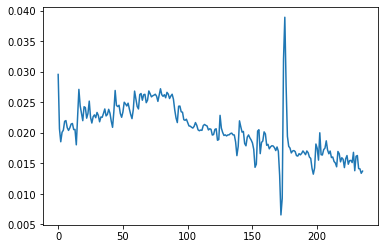

In [6]:
plt.plot(spec_dw_mean[wl_ind])

In [7]:
spec_dw_mean_3d = np.reshape(spec_dw_mean,(1,1,-1))

In [8]:
# Subtract deep water spectrum
im_sub = im - spec_dw_mean_3d
sand_spec_sub = spec_sand-spec_dw_mean_3d

In [9]:
sand_spec_sub.shape

(74, 79, 300)

In [10]:
sand_spec_2d = np.reshape(sand_spec_sub,(-1,sand_spec_sub.shape[2]))

In [24]:
wl[130]

659.22

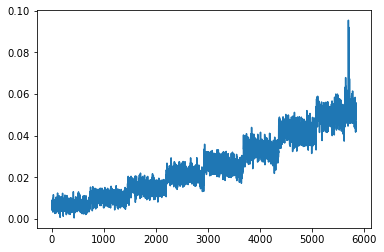

In [21]:
plt.plot(sand_spec_2d[:,78])

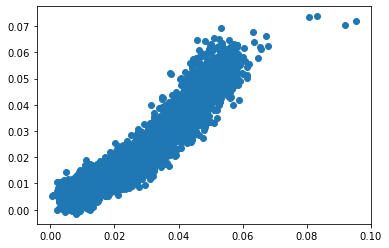

In [25]:
plt.scatter(sand_spec_2d[:,78],sand_spec_2d[:,125])

/tmp/ipykernel_40061/2339446873.py:1: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(sand_spec_2d[:,78]),np.log(sand_spec_2d[:,125]))


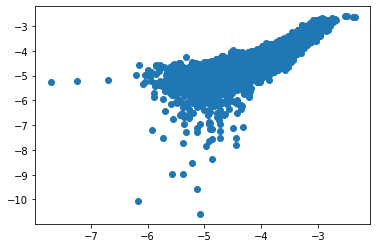

In [26]:
plt.scatter(np.log(sand_spec_2d[:,78]),np.log(sand_spec_2d[:,125]))

In [8]:
# Avoid negative values
im_sub[im_sub<0.001] = 0.001
sand_spec_sub[sand_spec_sub<0.001] = 0.001


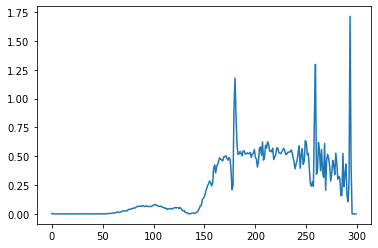

In [9]:
plt.plot(im_sub[500,300,:])

In [10]:
band_index = Lyzenga1981.di_index(im_sub,sand_spec_sub,rgb_ind[0],rgb_ind[1])

In [11]:
index_im = np.zeros(im[:,:,rgb_ind].shape)

In [12]:
index_im[:,:,0] = Lyzenga1981.di_index(im_sub,sand_spec_sub,rgb_ind[0],rgb_ind[1])
index_im[:,:,1] = Lyzenga1981.di_index(im_sub,sand_spec_sub,rgb_ind[1],rgb_ind[1])
index_im[:,:,2] = Lyzenga1981.di_index(im_sub,sand_spec_sub,rgb_ind[2],rgb_ind[1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


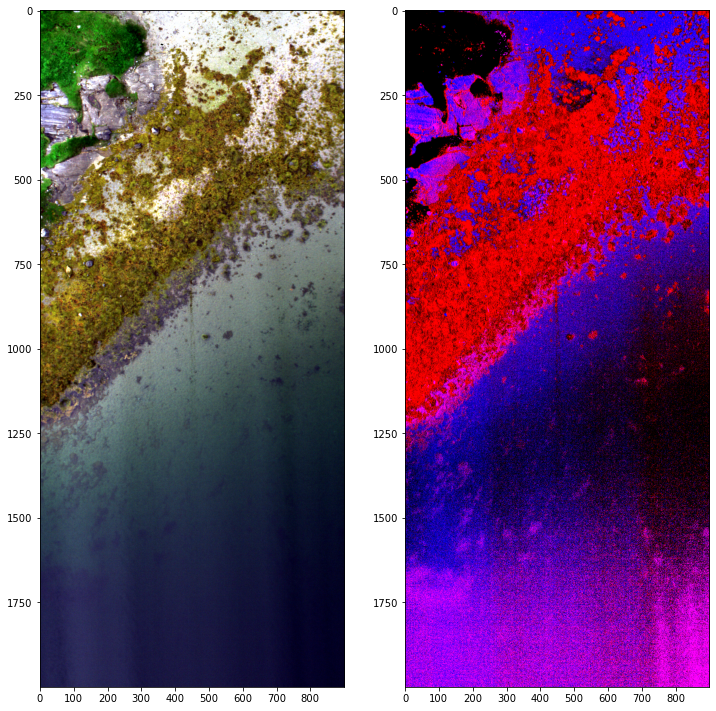

In [23]:
fig,ax = plt.subplots(ncols=2,figsize=(12,18))
ax[0].imshow(image_render.percentile_stretch(im[:,:,rgb_ind]))
ax[1].imshow(image_render.percentile_stretch(index_im,percentiles=(30,80),separate_bands=True))

In [14]:
index_im.min()

-3.3840797069560176

In [15]:
index_im.max()

2.995482274335853